# Neural network from scratch (Still in progress of writing it)
> Learn to build one so you can brag about it.

- toc: true 
- badges: true
- comments: true
- categories: [ai, deep learning]

To have genuine understanding of neural networks is valuable, because they feel like "black boxes". To be sure we understand it, we should build one from scratch. In this post I will explain concepts behind it and build one from scratch for classifying [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

# Prerequisities
Code is written in python and I use library called numpy for matrixes multiplication. A math behind Neural Networks can looks like daughting, but basically it is high school math. 

# Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MNIST dataset
Before we start to build one we have to import dataset to work with. For that I have prepared this code:

In [2]:
import requests, gzip, os, hashlib
# Source: http://yann.lecun.com/exdb/mnist/

def fetch(url):
    filename = url.split("/")[-1]
    full_filename = "dataset/mnist/" + f"{filename}"
    if os.path.isfile(full_filename):
        with open(full_filename, "rb") as f:
            dat = f.read()
    else:
        if not os.path.isdir("dataset"):
            os.mkdir("dataset")
        if not os.path.isdir("dataset/mnist"):
            os.mkdir("dataset/mnist")
        with open(full_filename, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return np.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

def mnist_dataset():
    X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
    Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
    X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
    Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]
    return (X_train, Y_train, X_test, Y_test)

X_train, Y_train, X_test, Y_test = mnist_dataset()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

MNIST dataset is made from 70000 images with width: 28 and height: 28. They are split in two parts. Training data (X_train) that consist 60000 images and testing data (X_test) each have a labels (Y_train & Y_test), which we use for validating if our network is right or wrong. To showcase it here we plot first image and its label:

Number 6


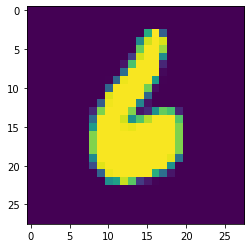

In [3]:
select = 1337
plt.imshow(X_train[select])
print(f"Number {Y_train[select]}")

# How it looks like?


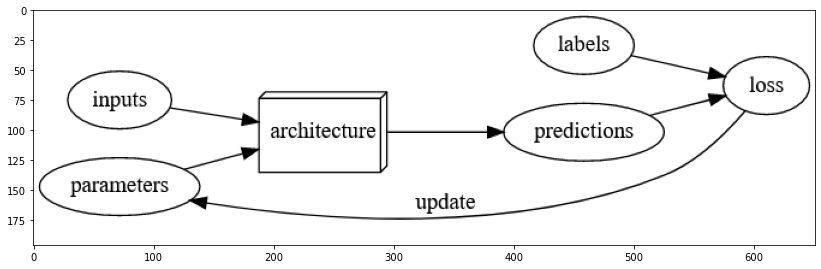

In [24]:
#hide_input
import matplotlib.image as mpimg
img = mpimg.imread('../images/fastai-NN.png')
plt.figure(num=None, figsize=(14, 12))
plt.imshow(img)